In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Profitable States:")
print(state_profit)


Top 10 Profitable States:
State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


In [9]:
state_loss = df.groupby('State')['Profit'].sum().sort_values().head(10)
print("Top 10 Loss States:")
print(state_loss)


Top 10 Loss States:
State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64


In [10]:
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_profit = df.groupby('Segment')['Profit'].sum()

print("Sales by Segment:\n", segment_sales)
print("\nProfit by Segment:\n", segment_profit)


Sales by Segment:
 Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

Profit by Segment:
 Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


In [11]:
category_sales = df.groupby('Category')['Sales'].sum()
category_profit = df.groupby('Category')['Profit'].sum()

print("Category Sales:\n", category_sales)
print("\nCategory Profit:\n", category_profit)


Category Sales:
 Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

Category Profit:
 Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [12]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
print(subcat_profit)


Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64


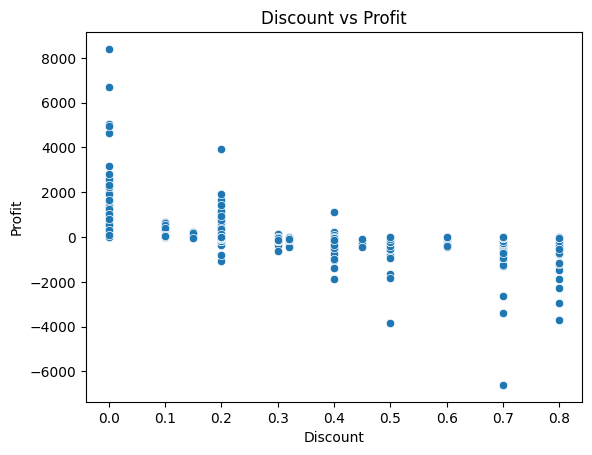

In [13]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.show()


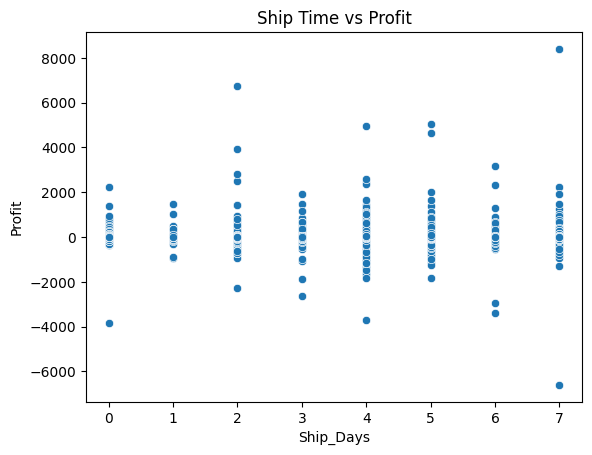

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

sns.scatterplot(data=df, x='Ship_Days', y='Profit')
plt.title("Ship Time vs Profit")
plt.show()

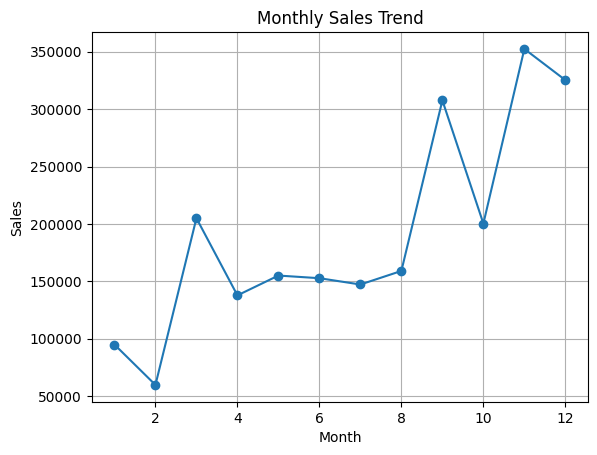

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month

month_sales = df.groupby('Month')['Sales'].sum()

plt.plot(month_sales.index, month_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


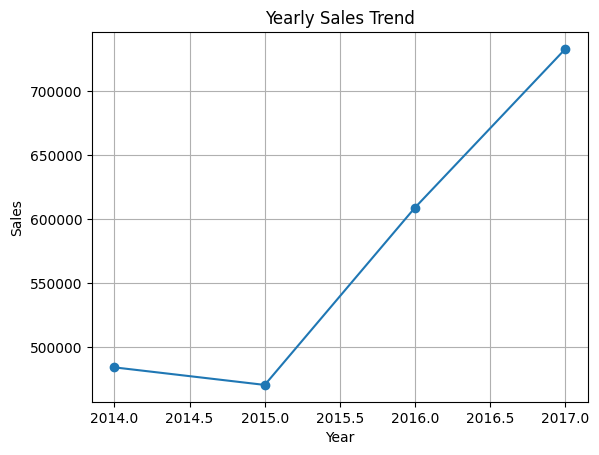

In [17]:
df['Year'] = df['Order Date'].dt.year
year_sales = df.groupby('Year')['Sales'].sum()

plt.plot(year_sales.index, year_sales.values, marker='o')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [18]:
import os
if not os.path.exists('charts'):
    os.makedirs('charts')


In [19]:
plt.savefig("charts/monthly_sales.png")
plt.show()


<Figure size 640x480 with 0 Axes>